<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/alzheimer_cnn/test_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from keras.metrics import categorical_accuracy
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend
import tensorflow as tf
import json
from keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [6]:
X_test = np.load('drive/MyDrive/alzheimer_datasets/X_test.npy', allow_pickle=True)
y_test = np.load('drive/MyDrive/alzheimer_datasets/y_test.npy', allow_pickle=True)

In [7]:
class LightAlexNet:
  @staticmethod
  def build(n_channels, 
            rows, 
            cols, 
            n_classes, 
            activation='relu', 
            weights_path=None):
    model = tf.keras.models.Sequential()
    
    input_Shape = (rows, cols, n_channels)
    
    model.add(tf.keras.layers.Conv2D(filters=128, 
                                  kernel_size=(10,10),
                                  strides=(2,2),
                                  activation=activation, 
                                  input_shape=input_Shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.5))
    
    
    model.add(tf.keras.layers.Conv2D(filters=256, 
                                  kernel_size=(8,8),
                                  strides=(2,2),
                                  activation=activation, 
                                  input_shape=input_Shape,
                                  padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.5))
    
    
    model.add(tf.keras.layers.Conv2D(filters=512, 
                                  kernel_size=(8,8),
                                  strides=(2,2),
                                  activation=activation, 
                                  input_shape=input_Shape,
                                  padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))


    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(512, activation=activation, kernel_regularizer=l2(0.01)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

    # if a weights path is supplied (inicating that the model was
    # pre-trained), then load the weights
    if weights_path is not None:
      model.load_weights(weights_path)
    
    return model

In [8]:
file_path='drive/MyDrive/alzheimer_datasets/alex_weights_train.h5'
test_model = LightAlexNet.build(n_channels=1, 
                                rows=100,
                                cols=100, 
                                n_classes=4, 
                                activation='relu', 
                                weights_path=file_path)

pred = test_model.predict(X_test, verbose=1)

319/319 [==============================] - 154s 474ms/step


In [9]:
precision, recall, f_betta, support = precision_recall_fscore_support(y_test.argmax(1), 
                                                                      pred.argmax(1),
                                                                      average='weighted')

accuracy = accuracy_score(y_test.argmax(1), pred.argmax(1))

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F Betta: {}'.format(f_betta))

Accuracy: 0.9517457826598666
Precision: 0.9523366393996786
Recall: 0.9517457826598666
F Betta: 0.951553760670827


In [10]:
data = pd.DataFrame(confusion_matrix(y_test.argmax(1), pred.argmax(1)), 
                    index = ['Mild', 'Moderated', 'Non', 'VeryMild'], 
                    columns = ['Mild', 'Moderated', 'Non', 'VeryMild'])

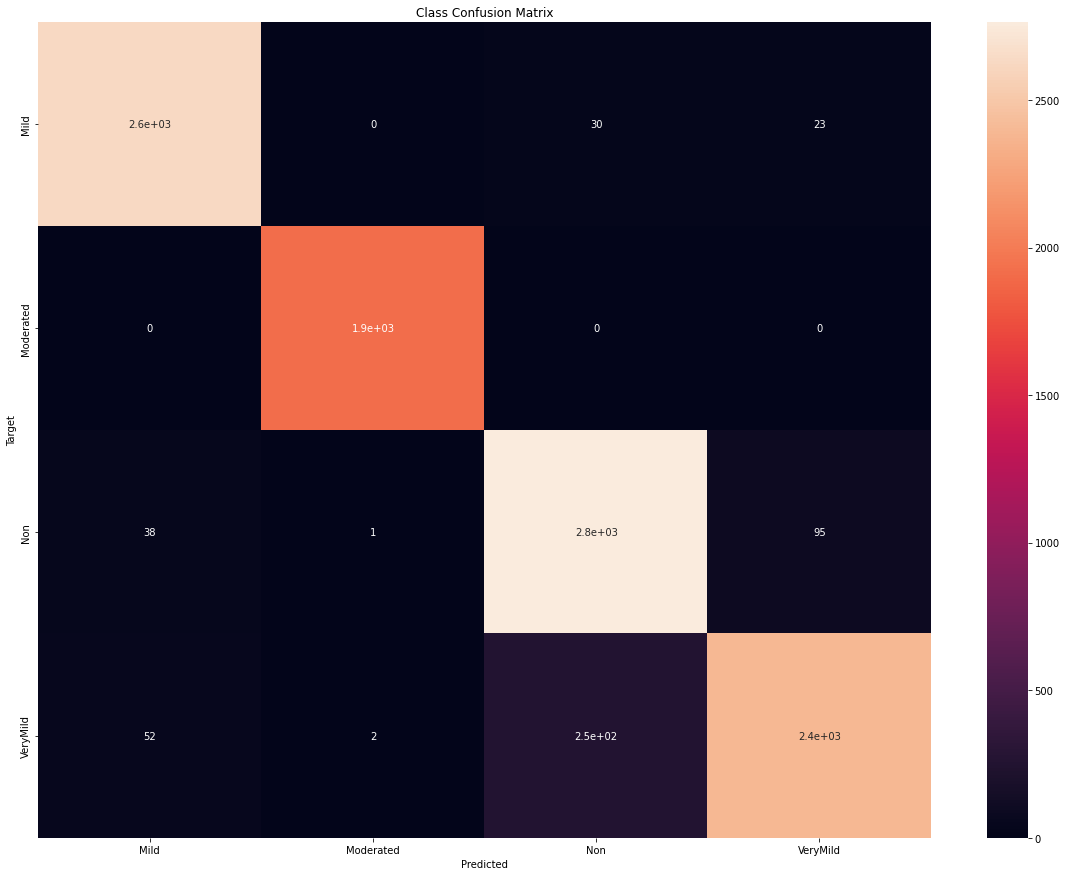

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = seaborn.heatmap(data, annot=True)
ax = plt.xlabel('Predicted')
ax = plt.ylabel('Target')
ax = plt.title('Class Confusion Matrix')